In [6]:
# Run thie cell to import everything we'll need.
import tensorflow as tf
import graph
import graph_test
from matplotlib import pyplot as plt
import unittest

%matplotlib inline

reload(graph)
reload(graph_test)

<module 'graph_test' from 'graph_test.pyc'>

# Fun with TensorFlow (10 points)

The goal of this section is to familiarize yourself with the Python [TensorFlow API](https://www.tensorflow.org/api_docs/python/index.html). We'll be using TensorFlow throughout the class to implement deep learning models, which are the state-of-the-art on many NLP tasks such as machine translation, sentiment analysis, and language modeling.

### TensorFlow: Declarative Numerical Programming

The TensorFlow programming model has two phases:
1.  **Construct a graph** by running Python code
2.  **Execute the graph** by calling `session.run`

In the **graph construction** phase, we operate on everything symbolically. Executing the Python code doesn't actually do any numerical calculations - it just tells TensorFlow how to do the computation later. Every variable you define here is a **Tensor**, which creates a node in the computation graph.

In the **execution phase**, we give TensorFlow input data and a list of output operations. It runs the data through the graph and returns numerical results as NumPy arrays.

#### Tensor Objects

Tensor objects are the symbolic equivalent of NumPy arrays, and support many similar operations. For example, to compute a linear model $y = vW + b$ in NumPy, you might do:
```python
# w, v are np.ndarray
y = np.dot(v, w) + b
```
In TensorFlow, this would be expressed as:
```python
# w, v, b are tf.Tensor
y = tf.matmul(v, w) + b
```

There are a few ways to define Tensors, but the most important are:

- **[Constants and sequences](https://www.tensorflow.org/versions/r0.10/api_docs/python/constant_op.html#constants-sequences-and-random-values)**, like tf.constant(), tf.zeros(), or tf.linspace(). These create a Tensor with a fixed value, and pretty much work like their NumPy equivalents.

- **[Variables](https://www.tensorflow.org/versions/r0.10/how_tos/variables/index.html)**, which are persistent and can be modified during execution. Think model parameters, which get updated by training.

- **[Placeholders](https://www.tensorflow.org/versions/r0.10/api_docs/python/io_ops.html#placeholder)**, which are used for data inputs. You feed these in by passing a NumPy array at execution time.

Operations on tensors - like `tf.matmul()` or `tf.nn.softmax()` - produce other tensors and add additional nodes to the graph.

#### Delayed Execution

The key difference between the NumPy code `y = np.dot(v, w) + b` and the TensorFlow equivalent `y = tf.matmul(v, w) + b` is that the latter _doesn't actually do the computation_. Instead, it tells TensorFlow that `y` is derived by performing the `matmul` operation on `v` and `w`, followed by adding `b`. In order to crunch the numbers, you need to run the graph, such as:
```python
# w, b defined as persistent tf.Variable, assume w is 10-dimensional vector
y = tf.matmul(v, w) + b  # Add Op (Tensor) to the graph
y_value = session.run(y, feed_dict={v=np.ones(10)})  # Run the graph
```
where `feed_dict` is how we "feed" input (NumPy arrays) to TensorFlow, and `y_value` will be a NumPy array containing the result of the computation.

This seems clunky for such a simple example - but it will dramatically simplify things when we start working with more complicated models.

## Part 0: Simple Adder

Open [`graph.py`](graph.py).  This file contains a number of class/function placeholders that we will implement through the course of this notebook - as well as a wealth of comments explaining how they work.

Implement the methods of the `AddTwo` class using TensorFlow.  In particular:
- `__init__` should construct a graph that adds the numbers.  Use two placeholders for the numbers to add.
- `Add` should (only) execute the graph with its two arguments and return the result.  It should not create any graph nodes or the session object.

When you are done, execute the next cell to test it, and verify that the unit tests below both pass.

Be sure that your adder can handle parameters of any dimension! (*Hint: TensorFlow will mostly do this automatically, unless you tell it not to.*)

In [7]:
reload(graph)
adder = graph.AddTwo()  # Internally, creates tf.Graph and tf.Session
print adder.Add(40, 2)
print adder.Add([1,2],[3,4])

42.0
[ 4.  6.]


In [8]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestAdder.test_adder', graph_test))

test_adder (graph_test.TestAdder) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.011s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

If you didn't already, make sure that your adder can handle parameters of any dimension.

In [9]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestAdder.test_vector_adder', graph_test))

test_vector_adder (graph_test.TestAdder) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.015s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## Part 1: Affine & Fully Connected Layers

In this section, you don't need to create the graph and session (but we wanted you to do it once so that you know how!).  Instead, you will simply implement functions that construct parts of a larger graph.

You will first build an affine layer: $z = xW + b$, and then a stack of fully connected layers, each implementing $h = f(xW + b)$.  You'll use the former as a building block for the latter.

### 1(a): Affine Layer
In particular, your function will accept a TensorFlow Op that represents the value of $x$ and should return value $z$ of desired dimension.  You must construct whatever variables you need.

Implement `affine_layer(...)`.

Hints:
- use `tf.get_variable()` to create variables.
- `W` should be randomly initialized using [Xavier initialization](https://www.tensorflow.org/versions/master/api_docs/python/contrib.layers/initializers)
- `b` should be initialized to a vector of zeros
- `a * b` is a element-wise product.  Look for the function that performs matrix products!

In [11]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestLayer.test_affine', graph_test))

test_affine (graph_test.TestLayer) ... 

(?, 3)


ok

----------------------------------------------------------------------
Ran 1 test in 1.050s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

### 1(b): Fully-Connected Layers
Next, we'll build a fully-connected layer, which we can use to build a network of arbitrary depth.

- Implement the `fully_connected_layers()` function.

*Hint:* Re-use the `affine_layer()` function you already wrote!

In [13]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestLayer.test_fully_connected_layers', graph_test))

test_fully_connected_layers (graph_test.TestLayer) ... 

(?, 3)
(?, 10)
(?, 20)
(?, 100)


ok

----------------------------------------------------------------------
Ran 1 test in 0.150s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

# Part 2: Training a Neural Network

Let's put it all together, and build a simple neural network that fits some training data.

- Implement the `train_nn()` function.

**Note:** you will need to do all the work (creating the graph and the session and a training op).

To get the tests to pass, please use [`tf.train.GradientDescentOptimizer`](https://www.tensorflow.org/api_docs/python/train/optimizers#GradientDescentOptimizer) as your optimizer.

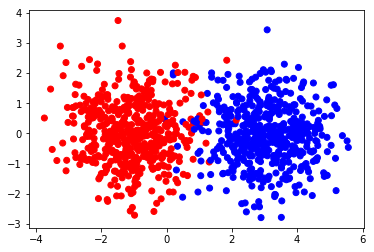

In [14]:
reload(graph_test)
X_train, y_train, X_test, y_test = graph_test.generate_data(1000, 10)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr')

In [16]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestNN.test_train_nn', graph_test))

test_train_nn (graph_test.TestNN) ... 

(?, 2)


ERROR

ERROR: test_train_nn (graph_test.TestNN)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "graph_test.py", line 69, in test_train_nn
    [], 50, 2, 0.001)
  File "graph.py", line 220, in train_nn
    x = affine_layer(1, fully_connected_layers(hidden_dims, x_ph), [1])
  File "graph.py", line 112, in affine_layer
    seed=seed)
  File "/home/rayb/anaconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 1024, in get_variable
    custom_getter=custom_getter)
  File "/home/rayb/anaconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 850, in get_variable
    custom_getter=custom_getter)
  File "/home/rayb/anaconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 346, in get_variable
    validate_shape=validate_shape)
  File "/home/rayb/anaconda3/envs/py27/lib/python2.7/site-packages/tensorflow/python/ops/varia

<unittest.runner.TextTestResult run=1 errors=1 failures=0>

That was fairly straightforward...  the data is clearly linearly separable.

### Tuning Parameters

Let's try our network on a problem that's a bit harder!

Here, we'll train a neural network with a couple of hidden layers before the final sigmoid.  This lets the network learn non-linear decision boundaries.

Try playing around with the hyperparameters to get a feel for what happens if you set the learning rate too big (or too small), or if you don't give the network enough capacity (i.e. hidden layers and width).

In [9]:
reload(graph_test)
X_train, y_train, X_test, y_test = graph_test.generate_non_linear_data(1000, 10)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr')

In [10]:
hidden_layers = [10, 10]
batch_size = 50
epochs = 2000
learning_rate = 0.001
predictions = graph.train_nn(X_train, y_train, X_test, hidden_layers, batch_size, epochs, learning_rate)

In [11]:
plt.scatter(X_test[:,0], X_test[:,1], c=predictions, cmap='bwr')

That looks pretty good!

Let's compare the predictions vs. the labels and see what we got wrong...

In [12]:
plt.scatter(X_test[:,0], X_test[:,1], c=(predictions==y_test), cmap='bwr')

Only a tiny number of errors (hopefully!).  Good work!

## Congratulations

You have implemented a deep neural network using tensorflow!

One remaining API you may want to take a look at is [tf.nn.embedding_lookup](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#embedding_lookup).  It is simply an op that takes a variable (like the "w" you did in your affine layer) and returns a column from it.  This will be useful later when we "embed" words into vector space.  We'll have our embedding table as a single variable with dimensions `[#words x word_vector_length]` and we'll use this op to select word vectors from it efficiently.